# CENG 463 Assignment 1

## Creating Feature and target variable splits for train, validation, and test sets


In [1]:
import pandas as pd
# google colab link: https://colab.research.google.com/drive/1BKFH5UpZTNiB3p5hVWBcbj41pg1ND_CS#scrollTo=_Z4-UXp3pSDi
# reading train, validation, and test sets into data frames
train_df = pd.read_csv("../content/train.csv")
val_df = pd.read_csv("../content/validation.csv")
test_df = pd.read_csv("../content/test.csv")

# converting dataframes for train, validation, and test into numpy arrays
train_data = train_df.values
val_data = val_df.values
test_data = test_df.values

# splitting columns for features and target variable
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_val = val_data[:, :-1]
y_val = val_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# displaying shapes of feature matrices and target vectors for each dataset
print("X train shape: ", X_train.shape, "y train shape: ", y_train.shape)
print("X validation shape: ", X_val.shape, "y validation shape: ", y_val.shape)
print("X test shape: ", X_test.shape, "y test shape: ", y_test.shape)

# we don't need to do any encoding for categorical variables as it was already done

X train shape:  (5199, 21) y train shape:  (5199,)
X validation shape:  (1300, 21) y validation shape:  (1300,)
X test shape:  (1625, 21) y test shape:  (1625,)


## Selecting Top 10 Most Relevant Features with Chi-Squared Test

feature 1 score is 89
feature 2 score is 17
feature 3 score is 0
feature 4 score is 788
feature 5 score is 2228
feature 6 score is 82
feature 7 score is 0
feature 8 score is 1013
feature 9 score is 28
feature 10 score is 22
feature 11 score is 340
feature 12 score is 839
feature 13 score is 620
feature 14 score is 81
feature 15 score is 63
feature 16 score is 94
feature 17 score is 189
feature 18 score is 88
feature 19 score is 9
feature 20 score is 555
feature 21 score is 291


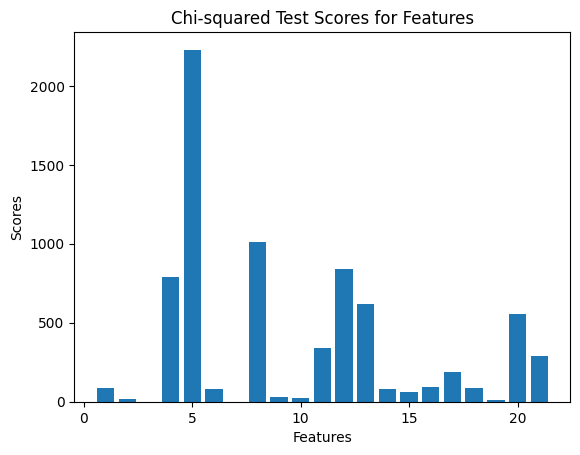


X train selected shape:  (5199, 10)
X validation selected shape:  (1300, 10)
X test selected shape:  (1625, 10)


In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# selecting top 10 most relevant features
feature_selector = SelectKBest(chi2, k=10)

feature_selector.fit(X_train, y_train)
X_train_selected = feature_selector.transform(X_train)
X_val_selected = feature_selector.transform(X_val)
X_test_selected = feature_selector.transform(X_test)

for i, score in enumerate(feature_selector.scores_):
    print("feature %d score is %d" % (i+1, score))

plt.bar([i for i in range(1, len(feature_selector.scores_)+1)], feature_selector.scores_)
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Chi-squared Test Scores for Features")
plt.show()

# displaying shape of selected feature matrices
print("\nX train selected shape: ", X_train_selected.shape)
print("X validation selected shape: ", X_val_selected.shape)
print("X test selected shape: ", X_test_selected.shape)


## Implementing K-Nearest Neighbor Algorithm

In [3]:
import numpy as np
from statistics import mode
# class that represents KNearestNeighbor Classifier
class K_Nearest_Neighbor_Classifier():
    def __init__(self, k):
      self.k = k

    def fit(self, X_train, Y_train):
      self.X_train = X_train
      self.Y_train = Y_train
      self.num_of_train_instances, self.num_of_features = X_train.shape

    def predict(self, X_test):
      self.X_test = X_test
      self.num_of_test_instances = X_test.shape[0]
      # initialize Y_predict array
      Y_predict = np.zeros(self.num_of_test_instances, dtype="i")
      for i in range(self.num_of_test_instances):
        x = X_test[i]
        # find nearest neighbors for current test instance
        neighbors = np.zeros(self.k)
        neighbors = self.get_neighbors(x, i)
        Y_predict[i] = mode(neighbors) #[0][0]

      return Y_predict

    # method to find k nearest neighbors of test instance x
    def get_neighbors(self, x, instance_index):
      hamming_distances = np.zeros(self.num_of_test_instances)

      for i in range(self.num_of_test_instances):
        if i != instance_index:
          distance = self.calculate_hamming_distance(x, self.X_train[i])
          hamming_distances[i] = distance
        else:
          hamming_distances[i] = np.inf

      # sort Y_train according to  hamming_distances array
      sorted_indices = hamming_distances.argsort()
      Y_train_sorted = self.Y_train[sorted_indices]

      return Y_train_sorted[:self.k]

    # method to calculate hamming distance between two instances
    def calculate_hamming_distance(self, x, y):
      distance = 0
      for i in range(self.num_of_features):
        if x[i] != y[i]:
          distance += 1

      return distance


## Implementing Naive Bayes Algorithm

In [4]:
import numpy as np
# class that represents Naive Bayes Classifier
class Naive_Bayes_Classifier():
    def fit(self, X_train, Y_train):
      self.X_train = X_train
      self.Y_train = Y_train
      self.prior_probs = dict()
      self.feature_probs = list()
      self.class_labels = np.unique(self.Y_train)
      self.num_of_train_instances, self.num_of_features = X_train.shape

      # for each class label we compute
      # prior probabilities
      for class_label in self.class_labels:
        label_count = 0
        for instance_label in self.Y_train:
          if class_label == instance_label:
            label_count += 1

        self.prior_probs[class_label] = label_count / len(self.Y_train)

      # creating a probability distribution table as a list
      # where each entry in list is a feature dictionary
      # holding feature levels as keys and dictionary value
      # which holds probabilities P(xi | yi) where yi is the
      # level that target feature takes on
      for row in range(len(self.X_train[0])):
        feature_levels = []
        for col in range(len(self.X_train)):
          if self.X_train[col][row] not in feature_levels:
            feature_levels.append(self.X_train[col][row])

        # add each feature level to feature dictionary as a key
        feature_dict = dict()
        for feature_level in feature_levels:
          feature_dict[feature_level] = dict()
          for class_label in self.class_labels:
            feature_dict[feature_level][class_label] = 0.0



        # add created feature dictionary to feature_probs list
        self.feature_probs.append(feature_dict)

      # computing P(xi | yi) for each (xi, yi) pair
      for feature_index, feature_dict in enumerate(self.feature_probs):
        for feature_level in feature_dict:
          for class_label in feature_dict[feature_level]:
             feature_dict[feature_level][class_label] = self.calculate_probability(feature_level, class_label, feature_index)


    def calculate_probability(self, feature_level, class_label, feature_index):
      count = 0
      for row in range(len(self.X_train)):
        if ((self.Y_train[row] == class_label) and (self.X_train[row][feature_index] == feature_level)):
          count += 1

      # Laplace smoothed probability
      return (count + 1) / (len(self.Y_train[self.Y_train == class_label]) + (1 * self.num_of_features))


    def predict(self, X_test):
      self.X_test = X_test
      self.num_of_test_instances = self.X_test.shape[0]

      predictions = np.zeros(self.num_of_test_instances, dtype="i")
      for row in range(self.num_of_test_instances):
        class_probs = np.zeros(len(self.class_labels))
        for i in range(len(self.class_labels)):
          class_probs[i] = self.calculate_prob_for_features_with_given_class(self.X_test[row], self.class_labels[i])

        # take the class_label with highest probability and add to predictions
        max_prob_index = np.argmax(class_probs)
        predictions[row] = self.class_labels[max_prob_index]

      return predictions


    def calculate_prob_for_features_with_given_class(self, row, class_label):
      probs_given_class_label = 1.0
      for feature_index, feature_level in enumerate(row):
        probs_given_class_label *= self.get_prob_of_feature_level(feature_level, feature_index, class_label)

      return probs_given_class_label * self.prior_probs[class_label]


    def get_prob_of_feature_level(self, feature_level, feature_index, class_label):
        return self.feature_probs[feature_index][feature_level][class_label]


## Testing Whether Our Own KNearestNeighbor and Naive Bayes Classifier Implementations are Working Correctly by Comparing with Sklearn Implementations

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# training and testing sklearn version of KNearestNeighborClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric="hamming")
knn.fit(X_train_selected, y_train)
y_pred_knn = knn.predict(X_val_selected)
print(y_pred_knn)
print(y_val)
accuracy = accuracy_score(y_val, y_pred_knn)

print("Accuracy score for sklearn KNN classifier is: %f" % accuracy)

# training and testing K_Nearest_Neighbor_Classifier implemented from scratch
knn_from_scratch = K_Nearest_Neighbor_Classifier(k=5)
knn_from_scratch.fit(X_train_selected, y_train)
knn_from_scratch_predictions = knn_from_scratch.predict(X_val_selected)
print(knn_from_scratch_predictions)
print(y_val)
accuracy = accuracy_score(y_val, y_pred_knn)

print("Accuracy score for KNN classifier implemented from scratch is: %f" % accuracy)

# training and testing sklearn version of NaiveBayesClassifier
BernoulliNB = BernoulliNB()
BernoulliNB.fit(X_train_selected, y_train)
naive_bayes_predictions = BernoulliNB.predict(X_val_selected)
print(naive_bayes_predictions)
print(y_val)
accuracy = accuracy_score(y_val, naive_bayes_predictions)

print("Accuracy for sklearn Bernoulli Naive Bayes classifier is: %f" % accuracy)

# training and testing Naive_Bayes_Classifier implemented from scratch
naive_bayes_from_scratch = Naive_Bayes_Classifier()
naive_bayes_from_scratch.fit(X_train_selected, y_train)
naive_bayes_from_scratch_predictions = naive_bayes_from_scratch.predict(X_val_selected)
print(naive_bayes_from_scratch_predictions)
print(y_val)

accuracy = accuracy_score(y_val, naive_bayes_from_scratch_predictions)
print("Accuracy for Naive Bayes classifier implemented from scratch is: %f" % accuracy)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
Accuracy score for sklearn KNN classifier is: 0.987692
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
Accuracy score for KNN classifier implemented from scratch is: 0.987692
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
Accuracy for sklearn Bernoulli Naive Bayes classifier is: 0.949231
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
Accuracy for Naive Bayes classifier implemented from scratch is: 0.949231


# Training Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

# training and testing sklearn version of DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_selected, y_train)
predictions_decision_tree = decision_tree_classifier.predict(X_val_selected)

## Implementing Ensemble Model Using Hard Voting

In [7]:
import numpy as np
from collections import Counter

# class that represents Ensemble Model Using Hard Voting
class HardVotingClassifier():
    def __init__(self, estimator_predictions):
      self.estimator_predictions = estimator_predictions

    def predict(self):
      predictions = np.zeros(len(self.estimator_predictions[0]), dtype="i")
      for i in range(len(predictions)):
        classes_for_instance = []
        for predictions_for_estimator in self.estimator_predictions:
          classes_for_instance.append(predictions_for_estimator[i])

        class_counts = Counter(classes_for_instance)
        predictions[i] = max(class_counts, key=class_counts.get)

      return predictions


## Running Decision Tree, KNearest Neighbor, and Naive Bayes Classifiers on validation set and acquiring evaluation metrics

<Figure size 640x480 with 0 Axes>

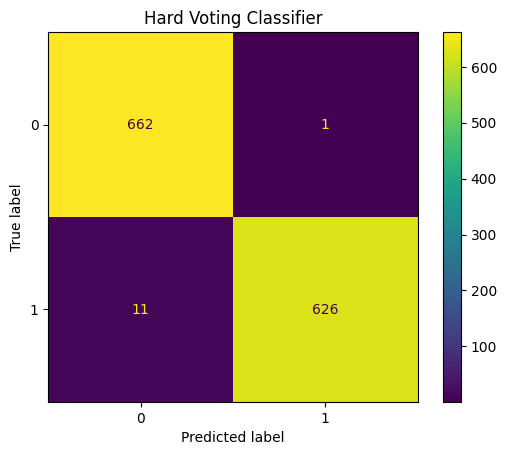


Accuracy for Hard Voting Classifier is: 0.990769
Precision for Hard Voting Classifier is: 0.998405
Recall for Hard Voting Classifier is: 0.982732
F1 score for Hard Voting Classifier is: 0.990506
Confusion matrix for %s is: 
 [[662   1]
 [ 11 626]]


<Figure size 640x480 with 0 Axes>

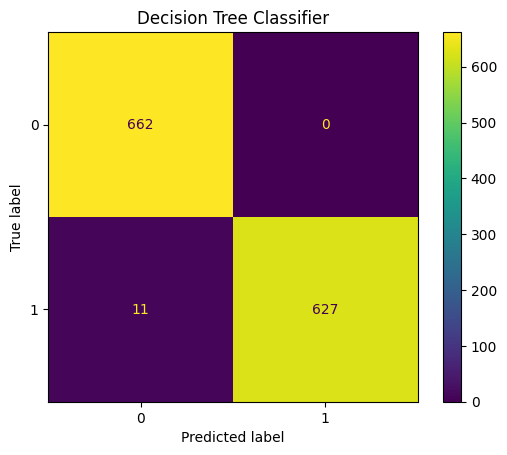


Accuracy for Decision Tree Classifier is: 0.991538
Precision for Decision Tree Classifier is: 1.000000
Recall for Decision Tree Classifier is: 0.982759
F1 score for Decision Tree Classifier is: 0.991304
Confusion matrix for %s is: 
 [[662   0]
 [ 11 627]]


<Figure size 640x480 with 0 Axes>

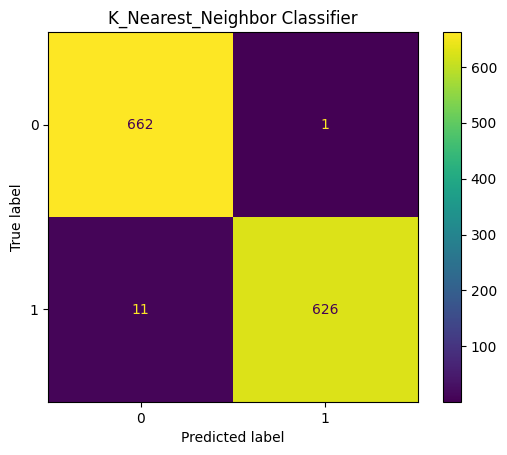


Accuracy for K_Nearest_Neighbor Classifier is: 0.990769
Precision for K_Nearest_Neighbor Classifier is: 0.998405
Recall for K_Nearest_Neighbor Classifier is: 0.982732
F1 score for K_Nearest_Neighbor Classifier is: 0.990506
Confusion matrix for %s is: 
 [[662   1]
 [ 11 626]]


<Figure size 640x480 with 0 Axes>

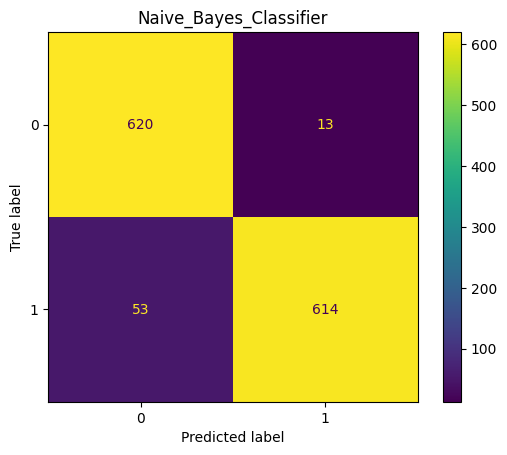


Accuracy for Naive_Bayes_Classifier is: 0.949231
Precision for Naive_Bayes_Classifier is: 0.979266
Recall for Naive_Bayes_Classifier is: 0.920540
F1 score for Naive_Bayes_Classifier is: 0.948995
Confusion matrix for %s is: 
 [[620  13]
 [ 53 614]]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

estimator_predictions = [predictions_decision_tree, knn_from_scratch_predictions, naive_bayes_from_scratch_predictions]
hard_voting_classifier = HardVotingClassifier(estimator_predictions)
hard_voting_predictions = hard_voting_classifier.predict()

# function to display evaluation metrics for each model
def display_evaluation_metrics(model_name, model_predictions, ground_truth_labels):
  accuracy = accuracy_score(model_predictions, ground_truth_labels)
  precision = precision_score(model_predictions, ground_truth_labels)
  recall = recall_score(model_predictions, ground_truth_labels)
  f1 = f1_score(model_predictions, ground_truth_labels)
  conf_matrix = confusion_matrix(model_predictions, ground_truth_labels)
  confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
  plt.figure()
  confusion_matrix_plot.plot()
  plt.title(model_name)
  plt.show()

  print("\nAccuracy for %s is: %f" % (model_name, accuracy))
  print("Precision for %s is: %f" % (model_name, precision))
  print("Recall for %s is: %f" % (model_name, recall))
  print("F1 score for %s is: %f" % (model_name, f1))
  print("Confusion matrix for %s is: \n", conf_matrix)


display_evaluation_metrics("Hard Voting Classifier", hard_voting_predictions, y_val)
display_evaluation_metrics("Decision Tree Classifier", predictions_decision_tree, y_val)
display_evaluation_metrics("K_Nearest_Neighbor Classifier", knn_from_scratch_predictions, y_val)
display_evaluation_metrics("Naive_Bayes_Classifier", naive_bayes_from_scratch_predictions, y_val)



## Best Evaluation Score Is Obtained on DecisionTreeClassifier Using It on Test Set

<Figure size 640x480 with 0 Axes>

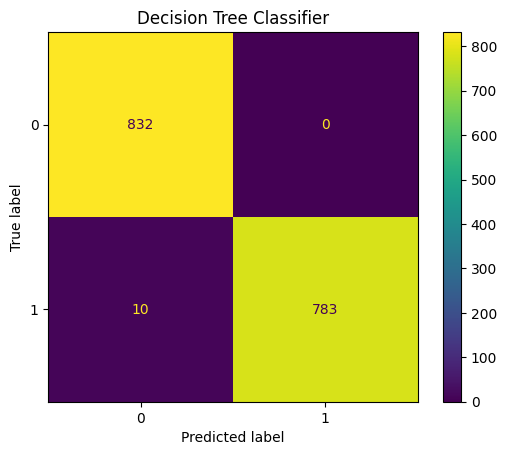


Accuracy for Decision Tree Classifier is: 0.993846
Precision for Decision Tree Classifier is: 1.000000
Recall for Decision Tree Classifier is: 0.987390
F1 score for Decision Tree Classifier is: 0.993655
Confusion matrix for %s is: 
 [[832   0]
 [ 10 783]]


In [9]:
# displaying evaluation metrics for test set
predictions_decision_tree = decision_tree_classifier.predict(X_test_selected)
display_evaluation_metrics("Decision Tree Classifier", predictions_decision_tree, y_test)

## Comprasion of Models and Best Performing Model

Based on our experimental results, it can be seen that best accuracy on validation set obtained by decision tree classifier. It might be the case that decision boundaries are complex than what KNearest Neighbor model can effectively handle, and the independence assumption of Naive Bayes is not met for our dataset. Even though hard voting ensembles usually perform better than individual models, it's performance is highly dependent on the quality of diversity of the base estimators If the base estimators are not diverse enough or have made similar errors which is our case because we can observe from confusion matrices that most of the misclassified instances are coming from False Negatives, the ensemble method might not perform significantly better than best individual estimator which is DecisionTreeClassifier in our case becasue of that reason. As a result, Decision tree classifier has shown ***best*** performance across all four models. Hard voting ensemble has shown better performance than individual Naive Bayes classifier and it has shown same performance as individual KNN classifier. ***Worst*** performing model is Naive Bayes classifier in our case.

---
Performance Order of Classifiers:

1. Decision Tree Classifier
2. Hard Voting Classifier - KNN Classifier (two classifiers have same performance)
3. Naive Bayes Classifier
